# Importations

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import random
import seaborn as sns

from sklearn import datasets
from sklearn import svm, naive_bayes
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC , SVR
from sklearn.metrics import r2_score
from mod.wine_regression import *

## Directory

In [24]:
INPUT_DIR = "./data/winequality_data.csv"

# Analyse et pre-processing des données

In [25]:
data = pd.read_csv(INPUT_DIR)

## Analyse descriptive

In [26]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Il n'y a aucune valeur nulle ou manquante dans notre jeu de données.

In [30]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [31]:
data.shape

(1599, 12)

In [32]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Analyse approfondie

### Histogrammes et boxplots

Pour vérifier l'existence de valeurs abérrantes, nous allons tracer les histogrammes et boxplots associés à chaque colonne de notre dataframe:

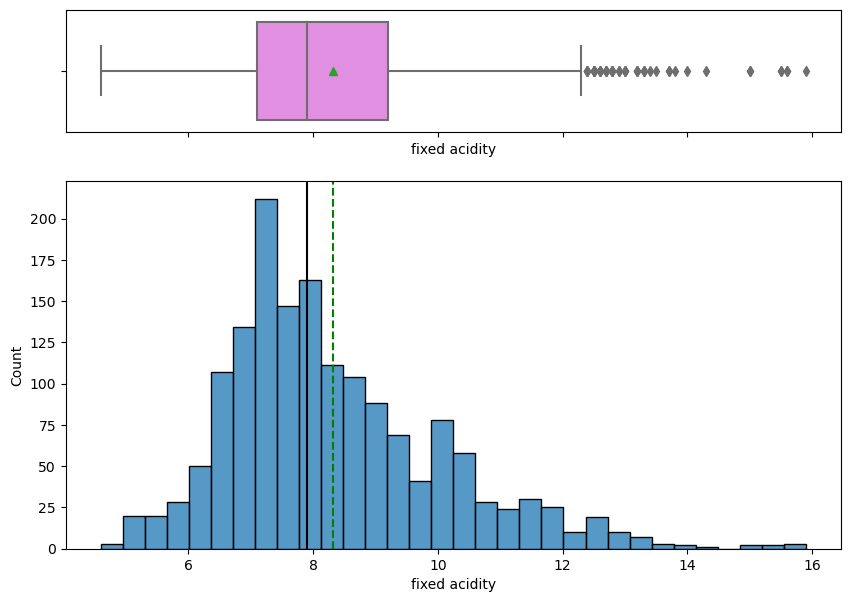

In [33]:
# Pour fixed acidity
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="fixed acidity", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="fixed acidity", ax=ax2)

ax2.axvline(data["fixed acidity"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["fixed acidity"].median(), color="black", linestyle="-") #Médiane

Dans ce cas-là, la commande 'data.describe()' ne laissait pas penser à une présence de valeurs aberrantes, et l'histogramme ci-dessus semble le confirmer.

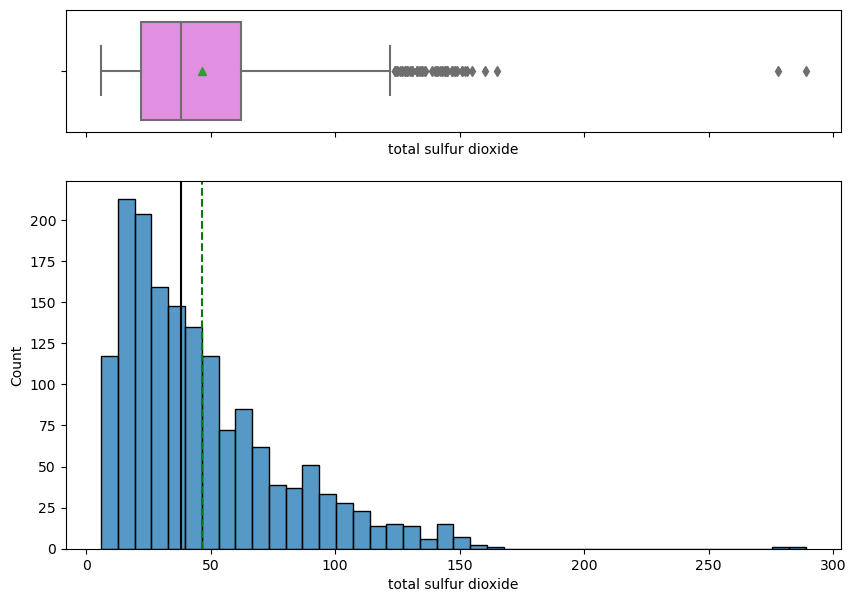

In [34]:
# Pour total sulfur dioxide
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="total sulfur dioxide", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="total sulfur dioxide", ax=ax2)

ax2.axvline(data["total sulfur dioxide"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["total sulfur dioxide"].median(), color="black", linestyle="-") #Médiane

Il y a effectivement des valeurs aberrantes pour la colonne total sulfur dioxide.

In [35]:
index_to_drop = data.loc[data['total sulfur dioxide'] > 200].index
data = data.drop(index_to_drop)
data.shape

(1597, 12)

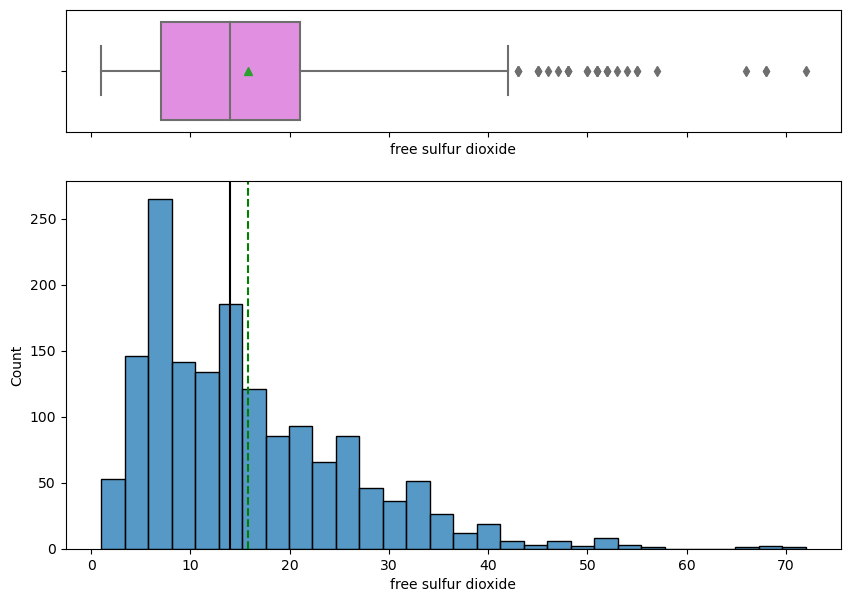

In [36]:
# Pour free sulfur dioxide
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="free sulfur dioxide", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="free sulfur dioxide", ax=ax2)

ax2.axvline(data["free sulfur dioxide"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["free sulfur dioxide"].median(), color="black", linestyle="-") #Médiane

Encore une fois, on se rend compte qu'il y a quelques valeurs que nous pouvons considérer comme étant aberrantes:

In [37]:
index_to_drop = data.loc[data['free sulfur dioxide'] > 60].index
data = data.drop(index_to_drop)
data.shape

(1593, 12)

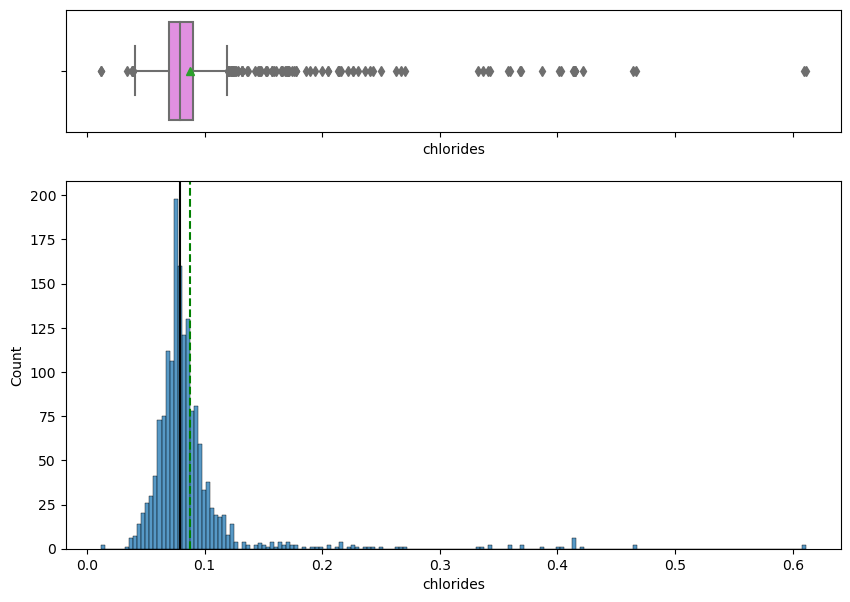

In [38]:
# Pour chlorides
fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    sharex=True, 
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=(10, 7)) 

sns.boxplot(data=data, x="chlorides", ax=ax1, showmeans=True, color="violet")

sns.histplot(data=data, x="chlorides", ax=ax2)

ax2.axvline(data["chlorides"].mean(), color="green", linestyle="--") #Moyenne
ax2.axvline(data["chlorides"].median(), color="black", linestyle="-") #Médiane

La colonne "chlorides" était également un bon candidat à la présence de valeurs aberrantes, et on retrouve en effet beaucoup de résidus sur l'histogramme ci-dessus.

In [39]:
index_to_drop = data.loc[data['chlorides'] > 0.3].index
data = data.drop(index_to_drop)
data.shape

(1571, 12)

### Mutual info score

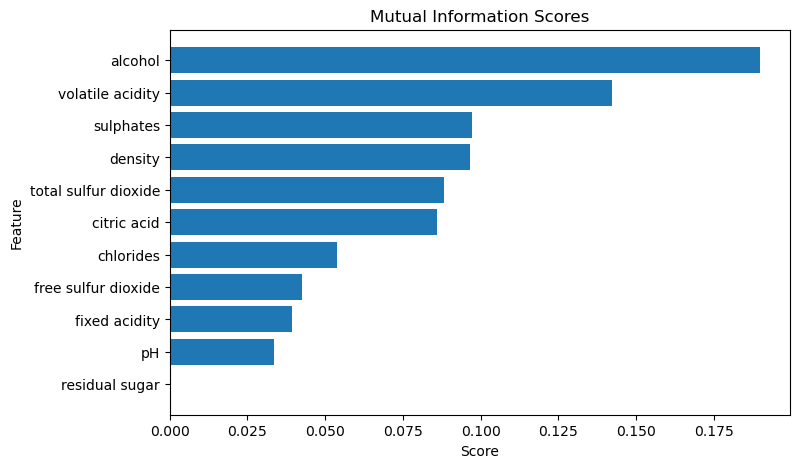

In [40]:
mi_scores = mutual_info_scores(data.loc[:, data.columns!="quality"], data["quality"])

plt.figure(dpi=100, figsize=(8, 5))
plt.xlabel("Score")
plt.ylabel("Feature")
plot_utility_scores(mi_scores)

Nous pouvons voir sur le graphique ci-dessus que l'alcool explique majoritairement la qualité du vin.

Nous remarquons au contraire plusieurs caractéristiques (fixed_acidity, chlorides, residual sugar, free sulfur dioxide et pH) dont le score d'information mutuelle est inférieur à 0.05. Nous allons donc nous affranchir de ces informations qui semblent moins significatives pour la prédiction.

In [41]:
data = data.drop(["free sulfur dioxide","residual sugar","pH","fixed acidity","chlorides"], axis = 1)
data.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,34.0,0.9978,0.56,9.4,5


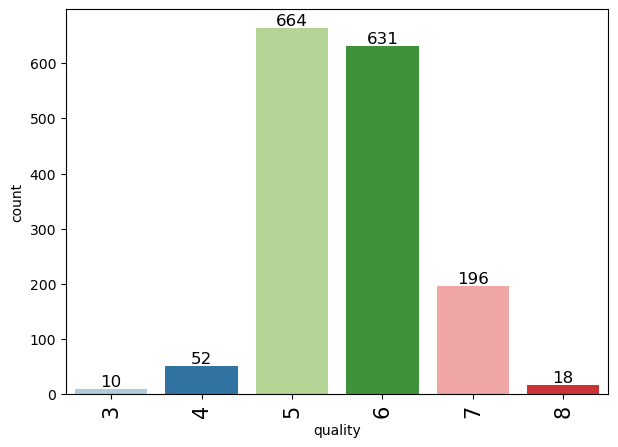

In [42]:
labeled_barplot(data, "quality")

In [43]:
X = data.loc[:, data.columns!="quality"]
y = data["quality"]
X.shape, y.shape

((1571, 6), (1571,))

# Modèles

## Modèle simple sans prétraitement

In [44]:
data_sp = pd.read_csv(INPUT_DIR)

In [46]:
X_sp = data_sp.loc[:, data_sp.columns!="quality"]
y_sp = data_sp["quality"]
X_sp.shape, y_sp.shape

((1599, 11), (1599,))

In [47]:
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sp, y_sp, test_size=0.2, random_state=42)

In [48]:
print(f'Training data:\n{X_train_sp[0:5]}\nTest data:\n{X_test_sp[0:5]}')

Training data:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
493            8.7             0.690         0.31             3.0      0.086   
354            6.1             0.210         0.40             1.4      0.066   
342           10.9             0.390         0.47             1.8      0.118   
834            8.8             0.685         0.26             1.6      0.088   
705            8.4             1.035         0.15             6.0      0.073   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
493                 23.0                  81.0  1.00020  3.48       0.74   
354                 40.5                 165.0  0.99120  3.25       0.59   
342                  6.0                  14.0  0.99820  3.30       0.75   
834                 16.0                  23.0  0.99694  3.32       0.47   
705                 11.0                  54.0  0.99900  3.37       0.49   

     alcohol  
493     11.6  
354     11.9  
34

In [49]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm_sp = LinearRegression()
scores_sp = cross_val_score(mod_non_norm_sp, X_train_sp, y_train_sp, cv=10)
print("Score sans normalisation des données :", scores_sp.mean())

Score sans normalisation des données : 0.3230213163533233


In [50]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm_sp = scaler.fit_transform(X_train_sp)

mod_norm_sp = LinearRegression()
scores_norm_sp = cross_val_score(mod_norm_sp, X_train_norm_sp, y_train_sp, cv=10)
print("Score avec normalisation des données :", scores_norm_sp.mean())


Score avec normalisation des données : 0.3230213163533239


## Avec le prétraitement

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print(f'Training data:\n{X_train[0:5]}\nTest data:\n{X_test[0:5]}')

Training data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
665              0.590         0.14                  48.0  0.99810       0.56   
1338             0.500         0.00                  26.0  0.99448       0.45   
1540             0.520         0.08                  32.0  0.99646       0.63   
393              0.665         0.61                  95.0  0.99700       0.54   
1109             0.470         0.43                  66.0  0.99820       0.76   

      alcohol  
665       9.7  
1338      9.5  
1540     11.6  
393       9.1  
1109     10.8  
Test data:
      volatile acidity  citric acid  total sulfur dioxide  density  sulphates  \
1218             0.400         0.31                  24.0  0.99600       0.69   
641              0.590         0.44                  68.0  0.99920       0.63   
959              0.590         0.05                  32.0  0.99735       0.61   
1334             0.835         0.00                  11.0  0.99608 

In [53]:
# Entraîner un modèle de régression linéaire non-normalisé
mod_non_norm = LinearRegression()
scores = cross_val_score(mod_non_norm, X_train, y_train, cv=10)
print("Score sans normalisation des données :", scores.mean())

Score sans normalisation des données : 0.3507751461318938


In [54]:
# Entraîner un modèle de régression linéaire avec normalisation des données
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())


Score avec normalisation des données : 0.35077514613189387


In [55]:
X_test_norm = scaler.fit_transform(X_test)

In [56]:
print(f'Training data:\n{X_train_norm[0:5]}\nTest data:\n{X_test_norm[0:5]}')

Training data:
[[0.32191781 0.17721519 0.28187919 0.58957416 0.11801242 0.2       ]
 [0.26027397 0.         0.13422819 0.32378855 0.04968944 0.16923077]
 [0.2739726  0.10126582 0.17449664 0.469163   0.16149068 0.49230769]
 [0.37328767 0.7721519  0.59731544 0.50881057 0.10559006 0.10769231]
 [0.23972603 0.5443038  0.40268456 0.5969163  0.24223602 0.36923077]]
Test data:
[[0.27272727 0.40789474 0.11320755 0.42994811 0.34951456 0.42307692]
 [0.48863636 0.57894737 0.38993711 0.66716086 0.29126214 0.21153846]
 [0.48863636 0.06578947 0.16352201 0.53002224 0.27184466 0.30769231]
 [0.76704545 0.         0.03144654 0.43587843 0.18446602 0.30769231]
 [0.02272727 0.67105263 0.10691824 0.69681245 0.62135922 0.32692308]]


In [57]:
y_train_norm = y_train.astype('float32').to_numpy().astype(np.float32)
y_test_norm = y_test.astype('float32').to_numpy().astype(np.float32)

In [58]:
mod_norm = LinearRegression()
scores_norm = cross_val_score(mod_norm, X_train_norm, y_train_norm, cv=10)
print("Score avec normalisation des données :", scores_norm.mean())

Score avec normalisation des données : 0.35077514704865204


In [59]:
mod_norm.fit(X_train_norm, y_train_norm)
print("dans la formule de la regression on le coefficient directeur :", mod_norm.coef_)
print("et l'ordonnée :" ,mod_norm.intercept_)

dans la formule de la regression on le coefficient directeur : [-1.69393978  0.00560703 -0.42910565 -0.14858836  1.41587457  1.83419434]
et l'ordonnée : 5.485244556652964


### Observation préliminaire

avoir supprimer certaines colonnes a diminué notre réussite en test on garde tout le jeu de données. 

## REGRESSION SVR

In [60]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_test = svr.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print("R²:", r2)

R²: 0.09755105782073992


In [61]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.2,1.5],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma' :[0.1,0.8,1,1.1,1.4]
}
#SVM_GridSearchCV = GridSearchCV(svr, param_grid=param, scoring='neg_mean_squared_error', cv=5)
#SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
#SVM_GridSearchCV.best_params_

In [62]:
svr = SVR(C=1.5,gamma =1.4, kernel="rbf")
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.1544117326768395


### REGRESSION AVEC UN RANDOM FOREST

In [63]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.35626284517327944


In [64]:
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
            }
#SVM_GridSearchCV = GridSearchCV(rf, param_grid=param, scoring='r2', cv=40)
#SVM_GridSearchCV.fit(X_train_norm,y_train_norm)
#SVM_GridSearchCV.best_params_

# output
#{'max_depth': 15,
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'n_estimators': 150}

In [65]:
rf = RandomForestRegressor( max_depth =  15 ,min_samples_split= 2, n_estimators=  150, min_samples_leaf= 1 )
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

R²: 0.35829871577493266


En comparant le R² du modèle Random forest, du modèle SVM et de la régréssion linéaire, on peut conclure à des résultats assez décevant des modèles pour faire une regression des données. 
On peut maintenant tester plusieurs modèles en classification mutliclasse pour voir si l'étiquette de nos données se prette mieux à ce genre de prédiction. 

## Classification multiclasse

In [66]:
print(data.quality.value_counts())
y_classif = data.quality.values
type(y_classif)
X_classif = data.drop(["free sulfur dioxide","residual sugar","pH","volatile acidity","density","total sulfur dioxide","quality","chlorides"], axis = 1)
print(X_classif)

5    664
6    631
7    196
4     52
8     18
3     10
Name: quality, dtype: int64


KeyError: "['free sulfur dioxide', 'residual sugar', 'pH', 'chlorides'] not found in axis"

In [ ]:
X_train_classif,X_test_classif,y_train_classif,y_test_classif = train_test_split(X_classif,y_classif,test_size=0.2,random_state=1)

## SVM

In [ ]:
SVM = SVC(random_state=1)
SVM.fit(X_train_classif,y_train_classif)
predictions = SVM.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Support Vector Machine Score {}".format(score))

Support Vector Machine Score 0.60625


In [ ]:
param = {
    'C'     :[0.1,0.5,0.9,1,1.5,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
#SVM_GridSearchCV = GridSearchCV(SVM, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

In [ ]:
SVM_BestGridSearchCV1 = SVC(C = 1.5, gamma = 1.3, kernel = 'rbf')
SVM_BestGridSearchCV1.fit(X_train_classif,y_train_classif)
predictions = SVM_BestGridSearchCV1.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Support Vector Machine Grid Search CV Score {}".format(score))

Support Vector Machine Grid Search CV Score 0.625


### RANDOM FOREST

In [ ]:
rf_classif= RandomForestClassifier()
rf_classif.fit(X_train_classif,y_train_classif)
predictions = rf_classif.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Random Forest Score {}".format(score))

Random Forest Score 0.66875


In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
              'n_estimators': [50, 100, 150,200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]
}
#SVM_GridSearchCV = GridSearchCV(rf_classif, param_grid=param, scoring='accuracy', cv=40)
#SVM_GridSearchCV.fit(X_train_classif,y_train_classif)
#SVM_GridSearchCV.best_params_

In [ ]:
rf_classif= RandomForestClassifier( max_depth =  15 ,min_samples_split= 5, n_estimators=  200)
rf_classif.fit(X_train_classif,y_train_classif)
predictions = rf_classif.predict(X_test_classif)
score = round(accuracy_score(y_test_classif,predictions),5)
print("Random Forest Score {}".format(score))

Random Forest Score 0.65625
